### Import Libraries

In [809]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

### Read datasets

In [810]:
#data_13 = pd.read_csv("dataset/S013.csv")
#data_14 = pd.read_csv("dataset/S014.csv")
data_24 = pd.read_csv("dataset/S024.csv")
data_27 = pd.read_csv("dataset/S027.csv")
data_28 = pd.read_csv("dataset/S028.csv")
data_29 = pd.read_csv("dataset/S029.csv")

### Plot the data

In [811]:
plotMerge1 = data_24.append(data_27)
plotMerge2 = plotMerge1.append(data_28)
plottingData = plotMerge2.append(data_29)

plottingData['label'].unique()

/tmp/ipykernel_3174200/2553430372.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plotMerge1 = data_24.append(data_27)
/tmp/ipykernel_3174200/2553430372.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plotMerge2 = plotMerge1.append(data_28)
/tmp/ipykernel_3174200/2553430372.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plottingData = plotMerge2.append(data_29)


array([  6,   1,   7,   8,   3,   5,   2,   4,  13, 130])

In [812]:
def label_num_sampled(row):
    labels = -1
    if row['label'] < 9:
        labels = int(row['label']) - 1
    else:
        if row['label'] == 13:
            labels = 8
        else:
            labels = 9
    return labels

In [813]:
def label_num_to_str(row):
    label_strings = ['walking', 'running', 'shuffling', 'stairs asc', 'stairs dsc', 'standing', 'sitting', 'lying', 'cycling (sit)', 'cycling (sit, inactive)']
    return label_strings[row['labels']]

In [814]:
plottingData['labels'] = plottingData.apply(label_num_sampled, axis=1)

In [815]:
plottingData['activity'] = plottingData.apply(label_num_to_str, axis=1)

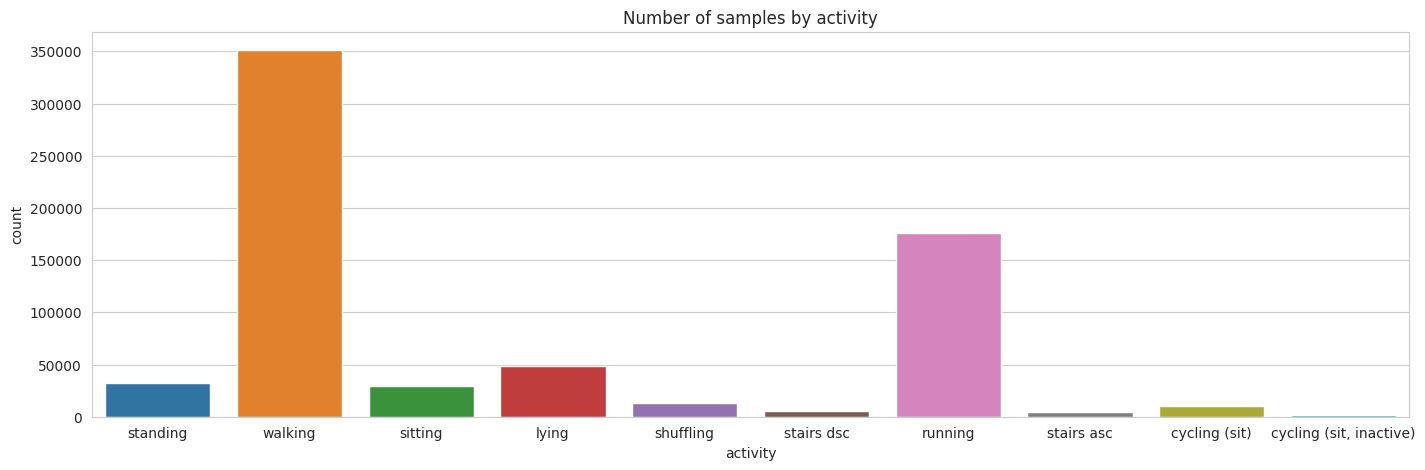

In [877]:
sns.set_style('whitegrid')
plt.figure(figsize = (17, 5))
sns.countplot(x = 'activity', data = plottingData)
plt.title('Number of samples by activity')
plt.show()

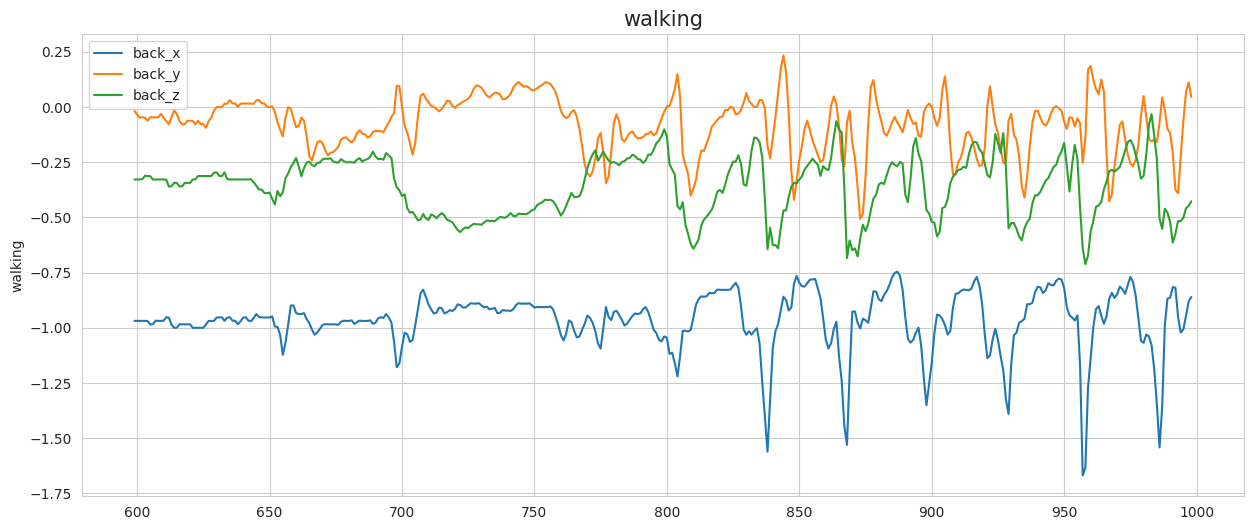

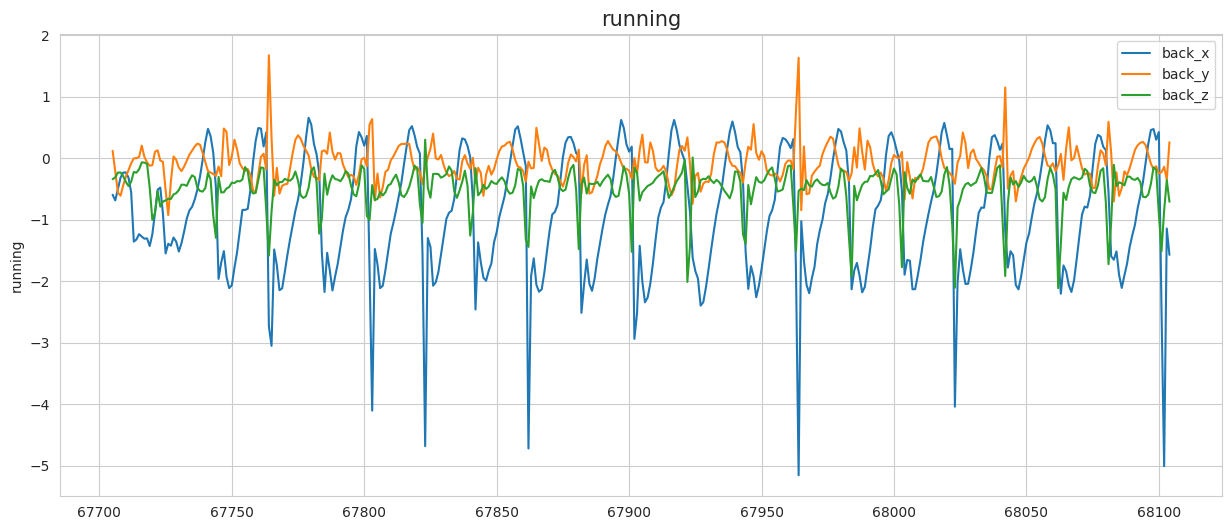

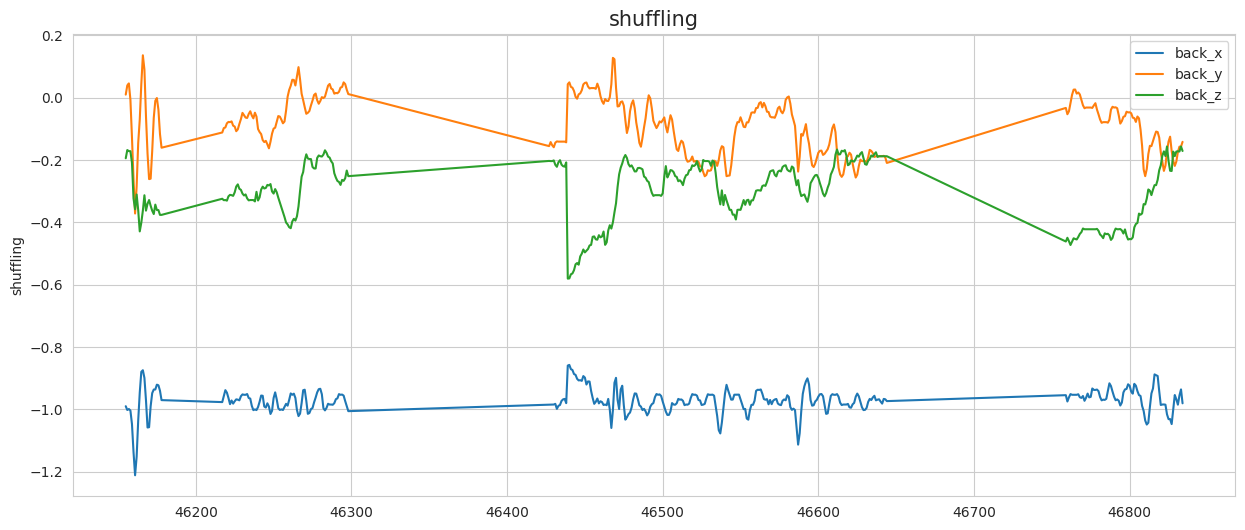

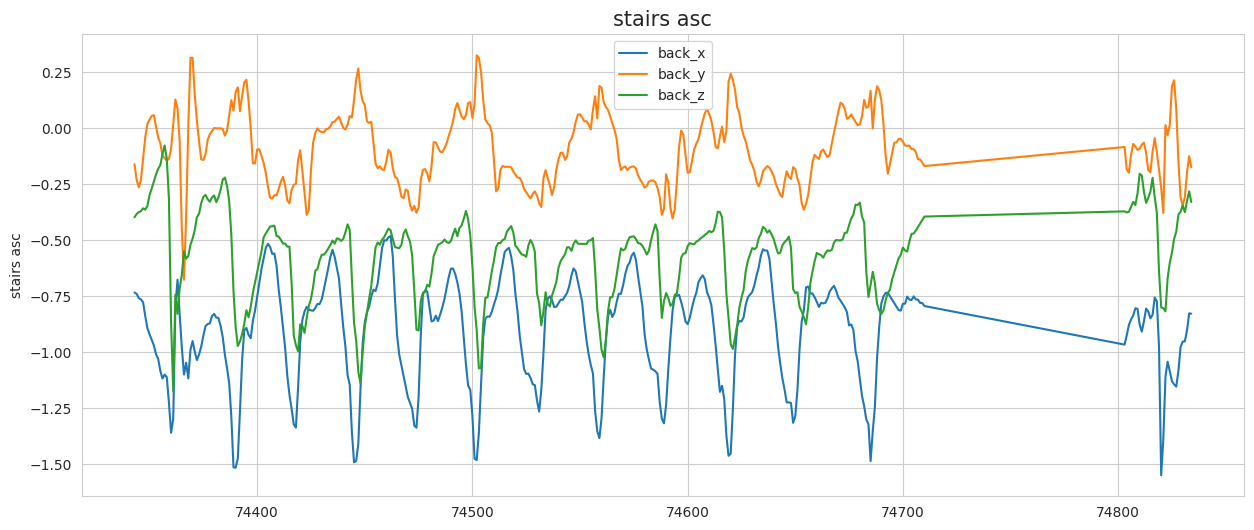

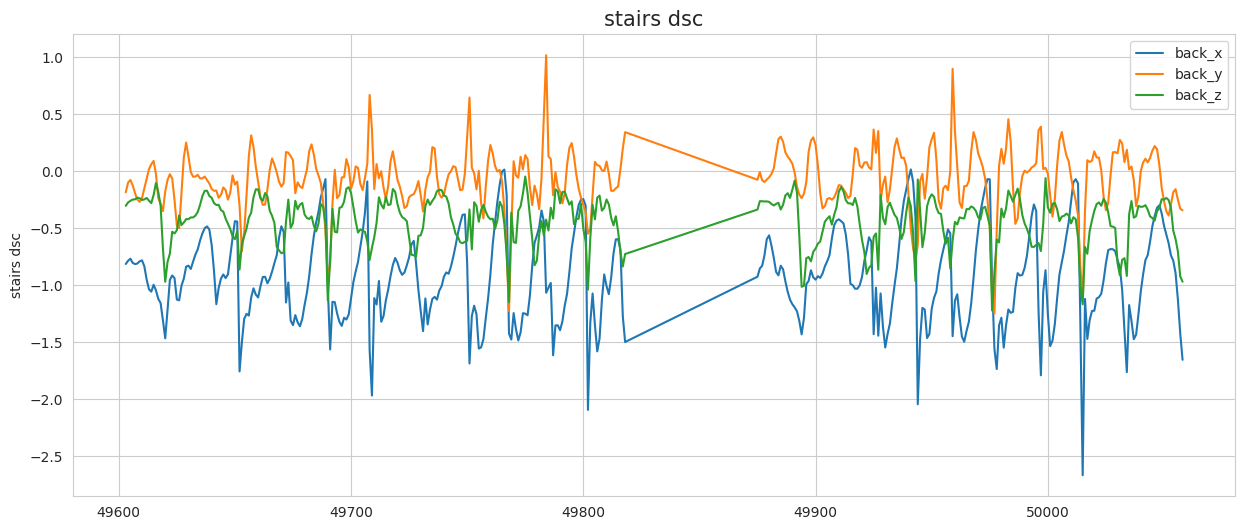

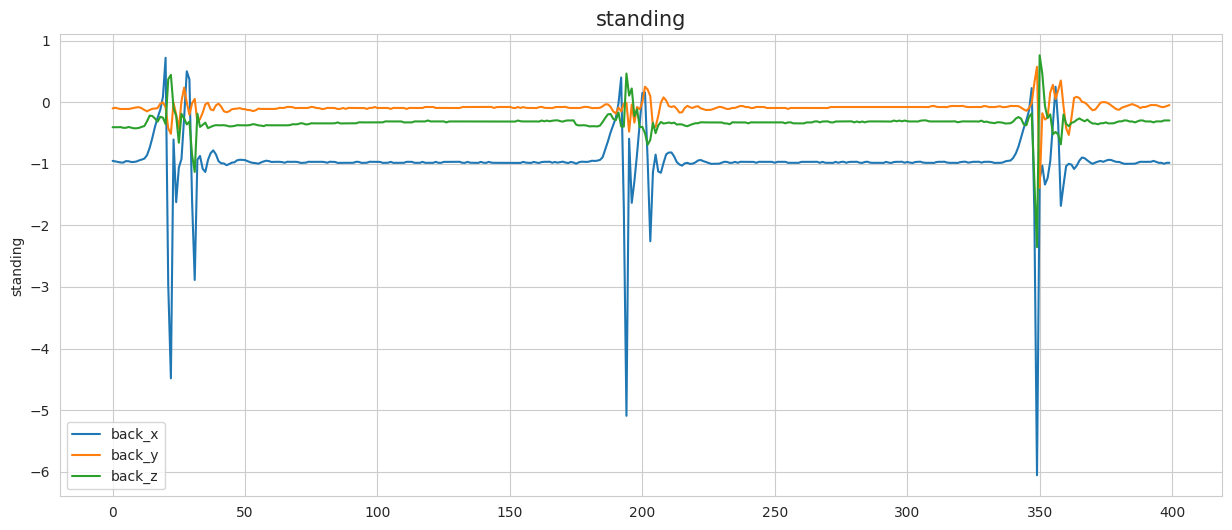

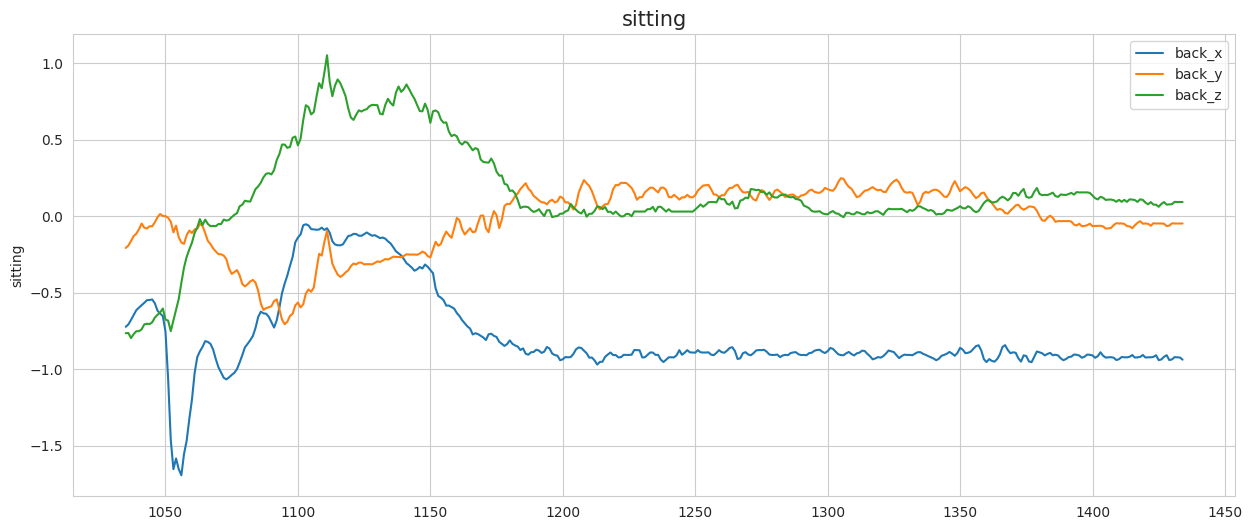

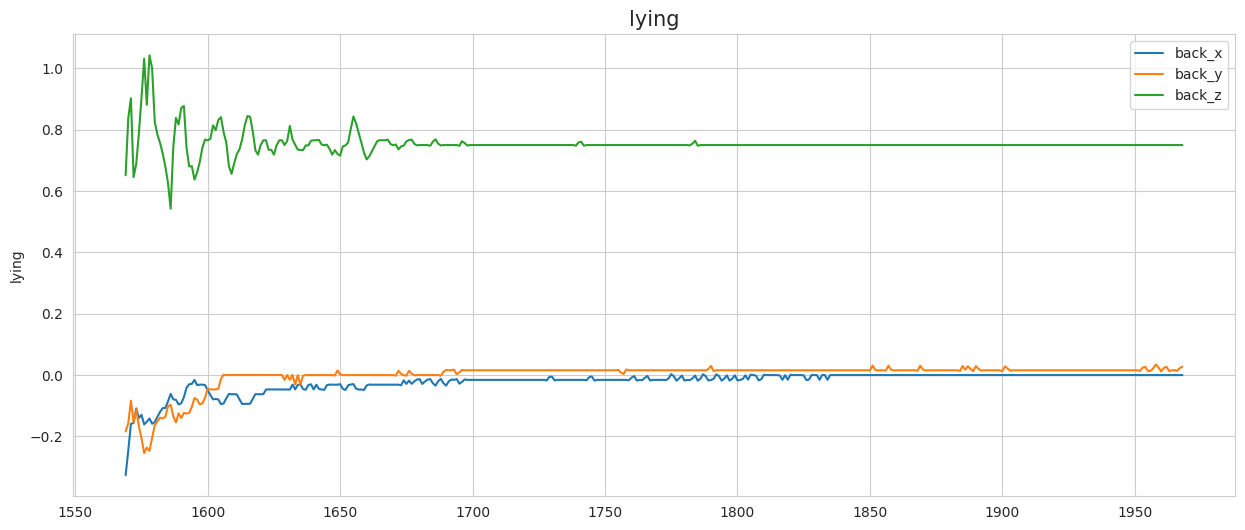

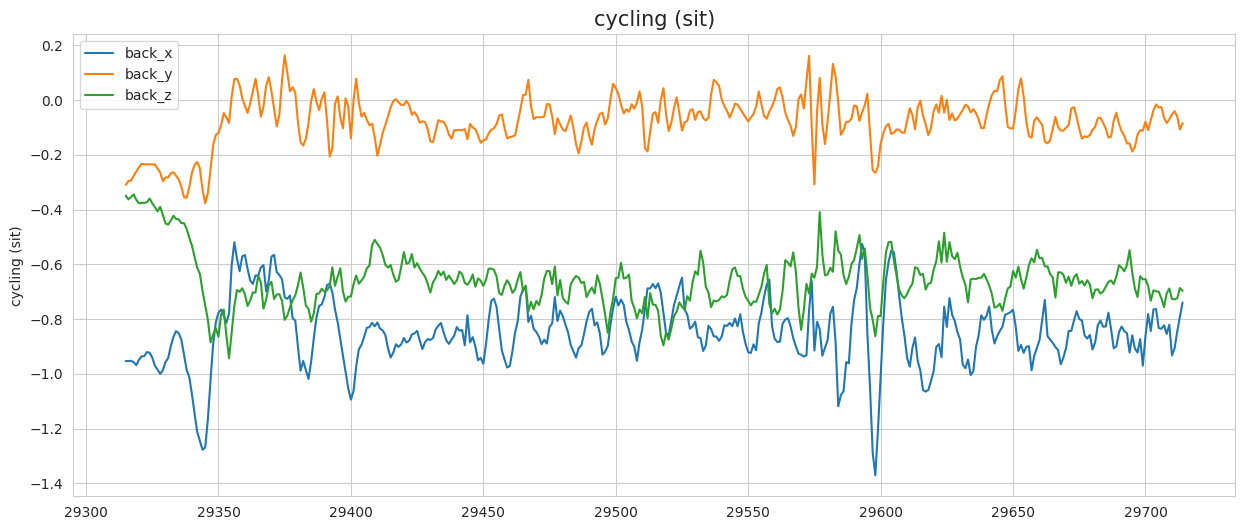

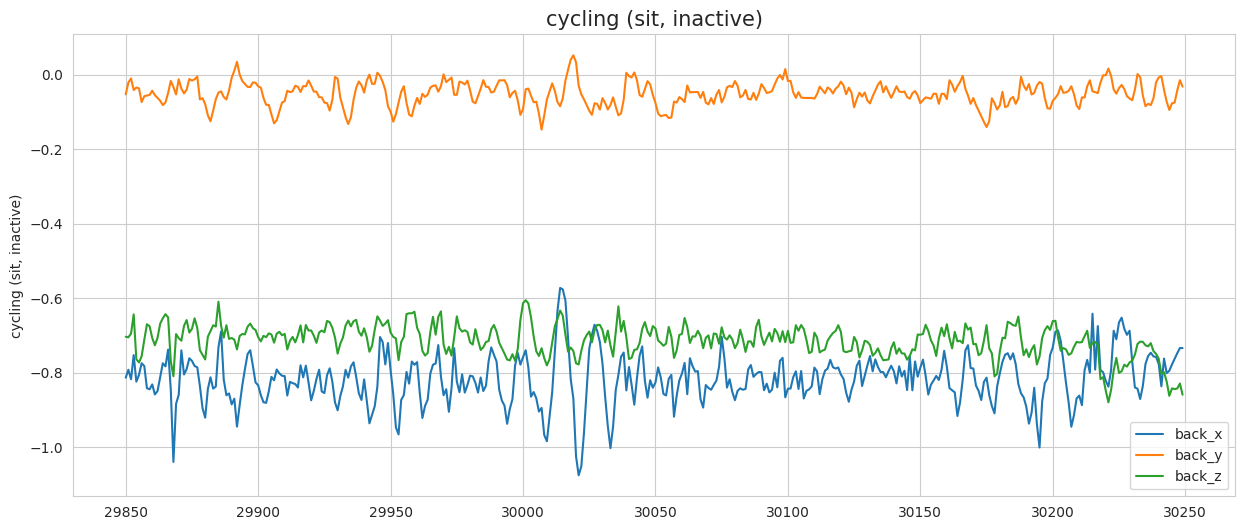

In [817]:
for label in label_strings:
  data = plottingData[plottingData['activity'] == label][:400]
  plt.figure(figsize = (15, 6))
  sns.lineplot(y = 'back_x', x = data.index, data = data)
  sns.lineplot(y = 'back_y', x = data.index, data = data)
  sns.lineplot(y = 'back_z', x = data.index, data = data)
  plt.legend(['back_x', 'back_y', 'back_z'])
  plt.ylabel(label)
  plt.title(label, fontsize = 15)
  plt.show()

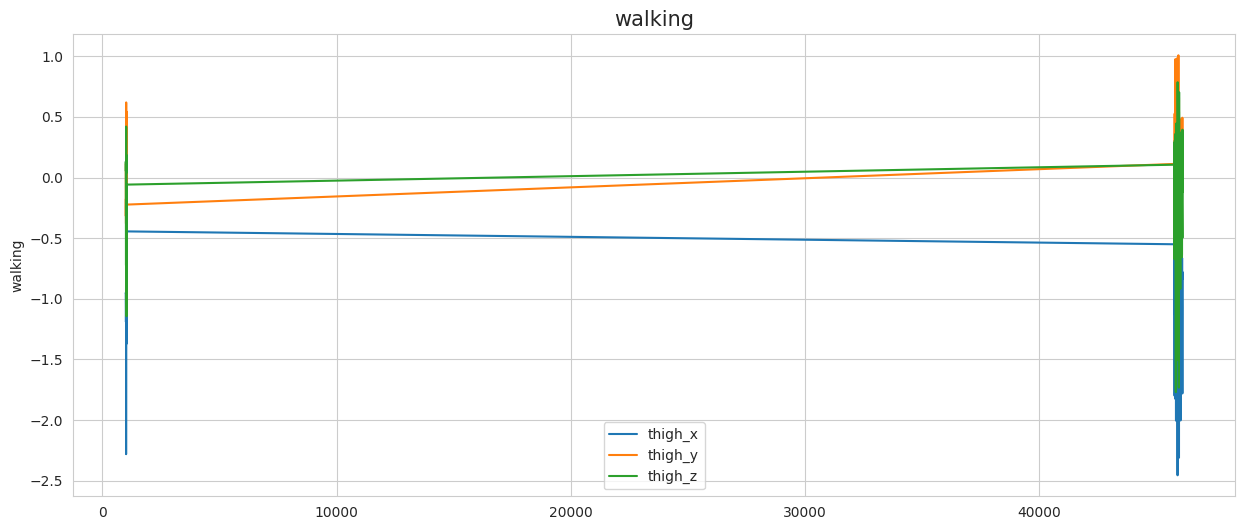

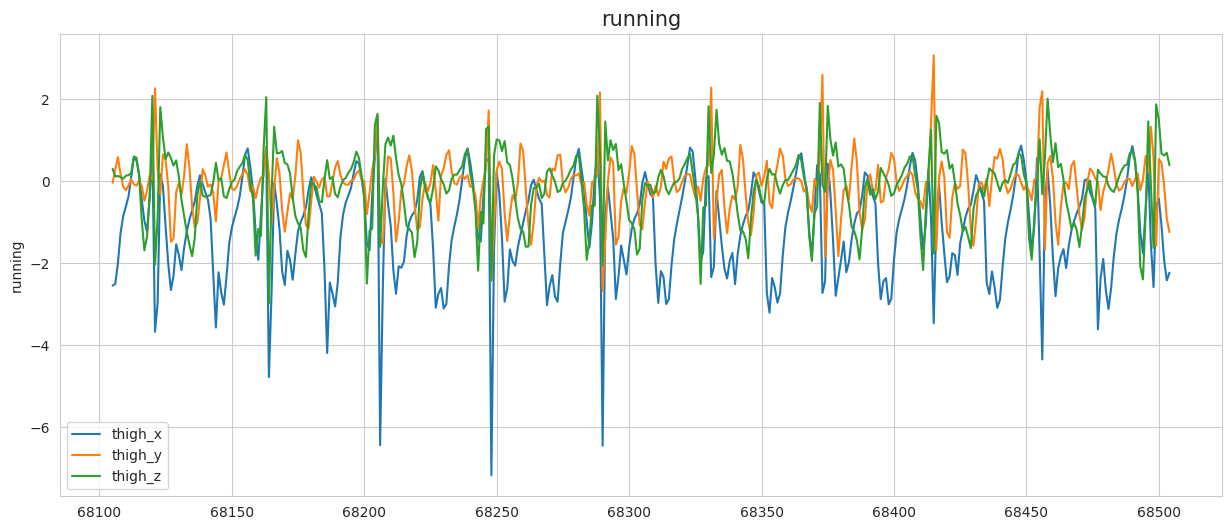

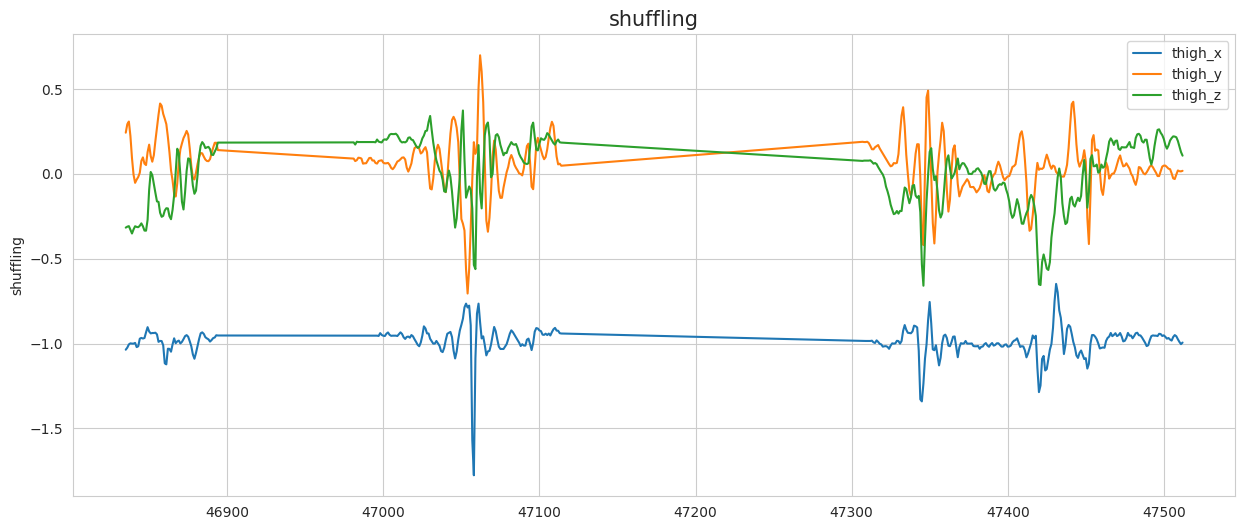

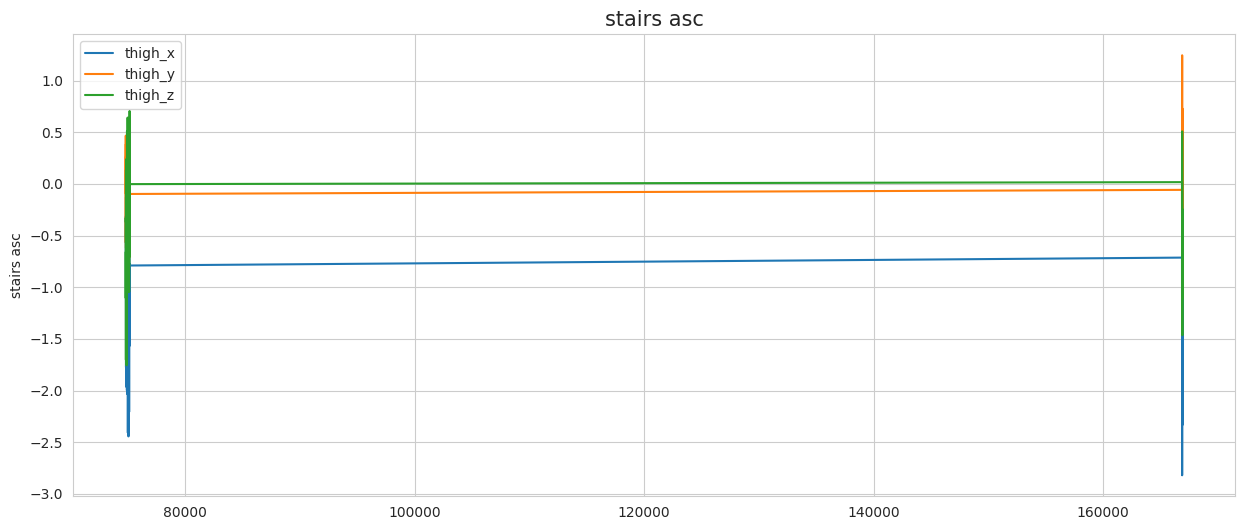

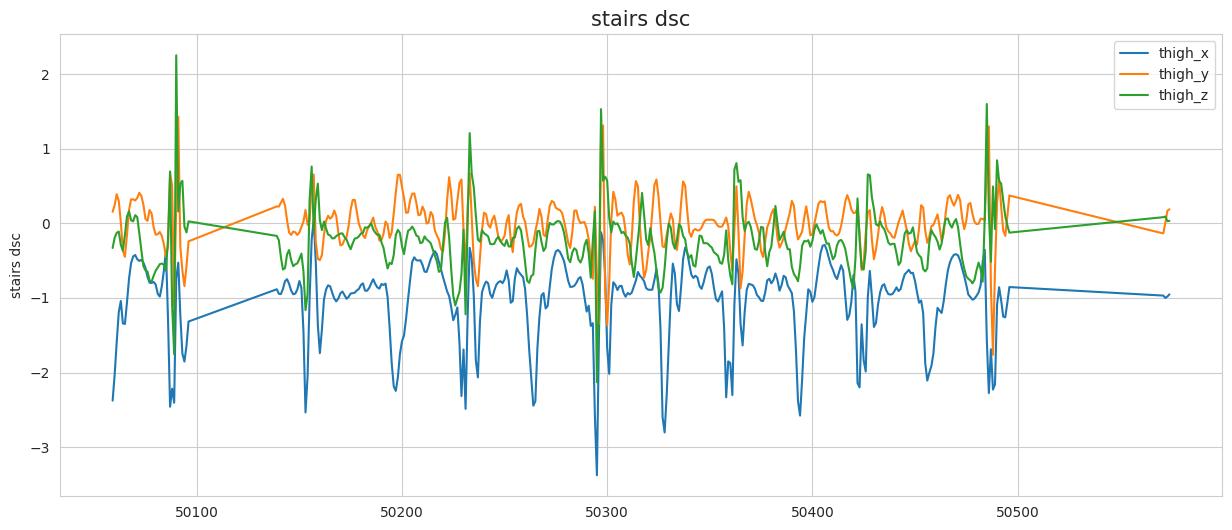

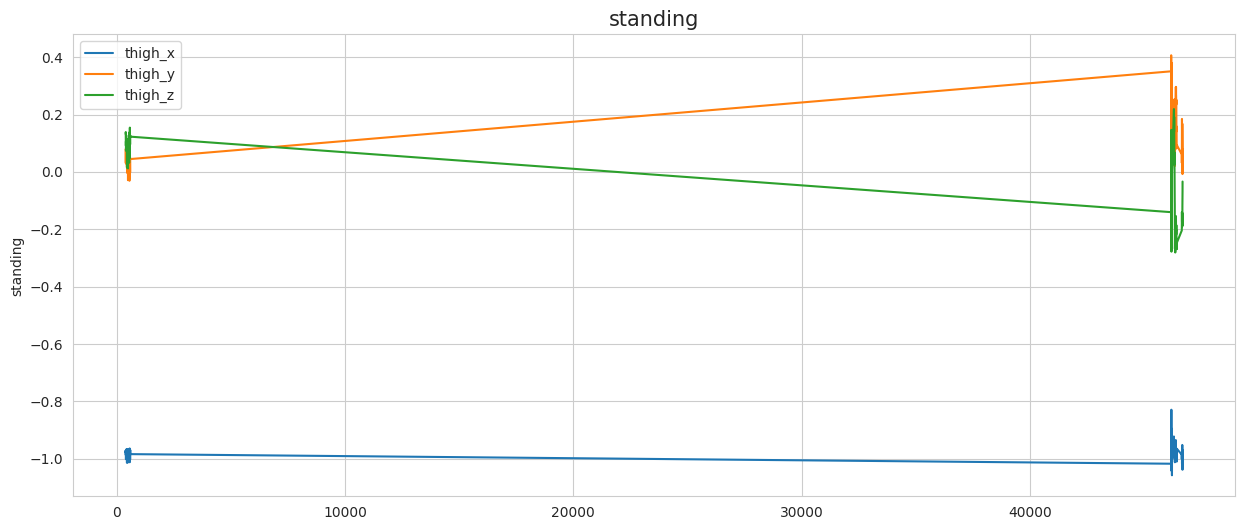

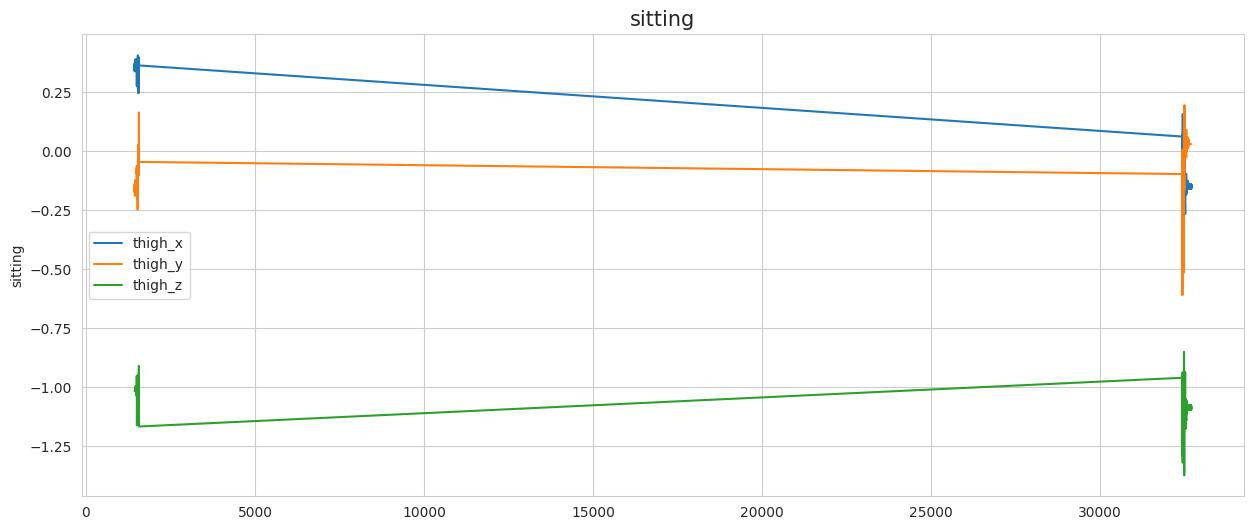

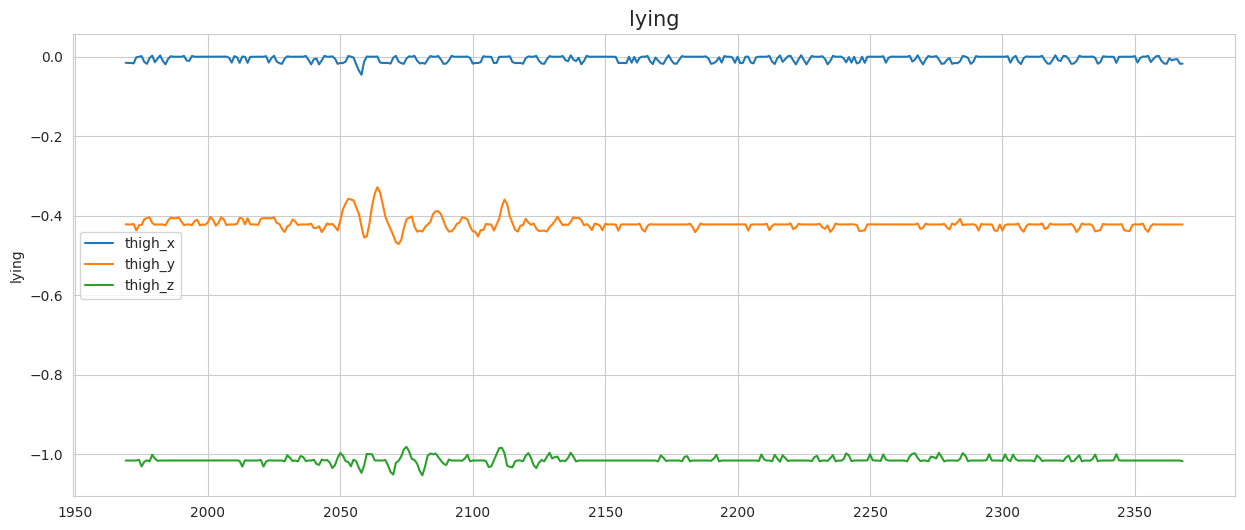

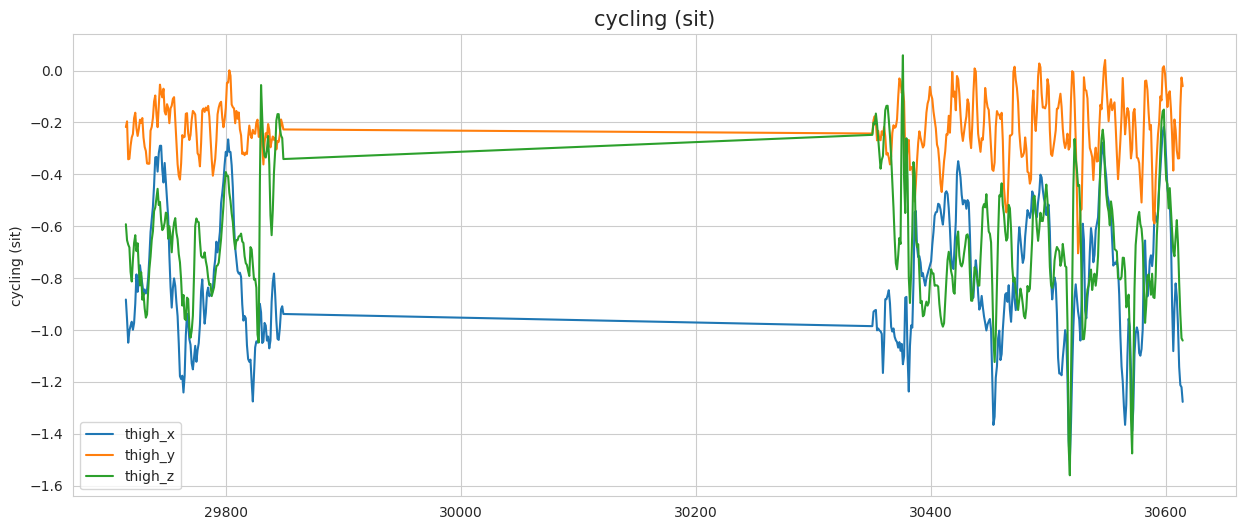

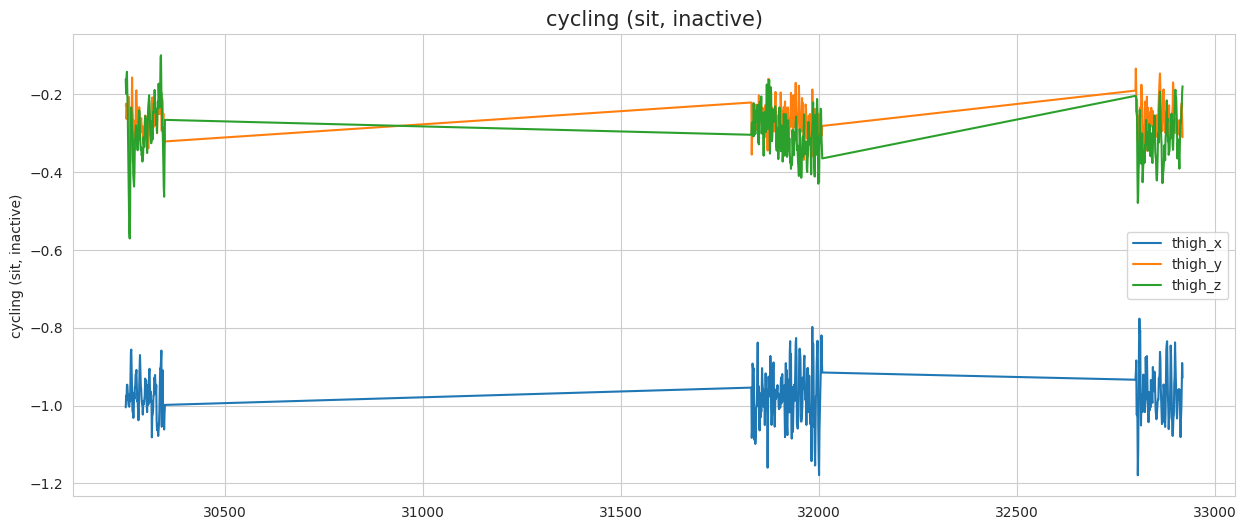

In [818]:
for label in label_strings:
  data = plottingData[plottingData['activity'] == label][400:800]
  plt.figure(figsize = (15, 6))
  sns.lineplot(y = 'thigh_x', x = data.index, data = data)
  sns.lineplot(y = 'thigh_y', x = data.index, data = data)
  sns.lineplot(y = 'thigh_z', x = data.index, data = data)
  plt.legend(['thigh_x', 'thigh_y', 'thigh_z'])
  plt.ylabel(label)
  plt.title(label, fontsize = 15)
  plt.show()

/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/D

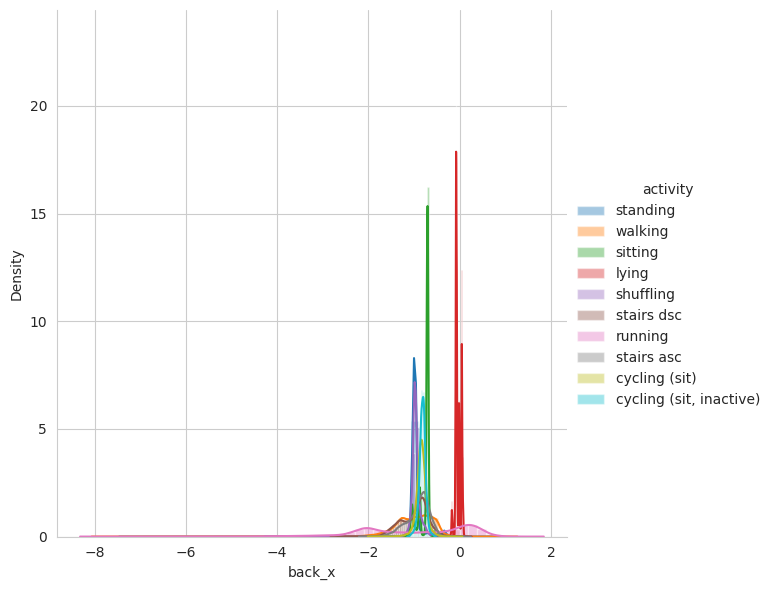

In [819]:
sns.FacetGrid(plottingData, hue ='activity', size = 6).map(sns.distplot, 'back_x').add_legend()

/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/D

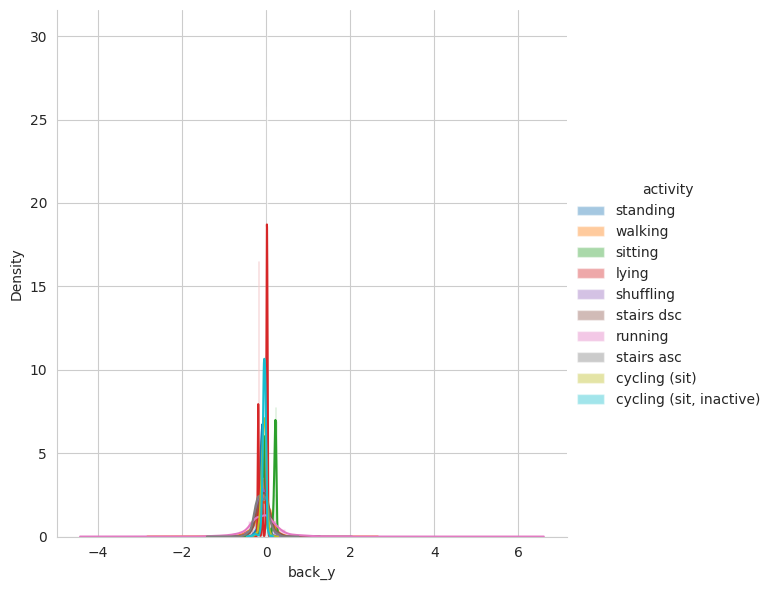

In [820]:
sns.FacetGrid(plottingData, hue ='activity', size = 6).map(sns.distplot, 'back_y').add_legend()

/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/D

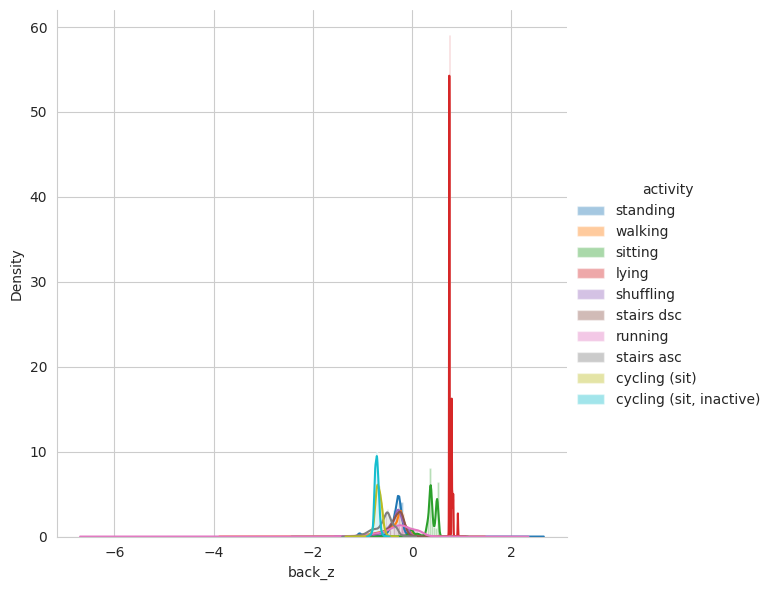

In [821]:
sns.FacetGrid(plottingData, hue ='activity', size = 6).map(sns.distplot, 'back_z').add_legend()

/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/D

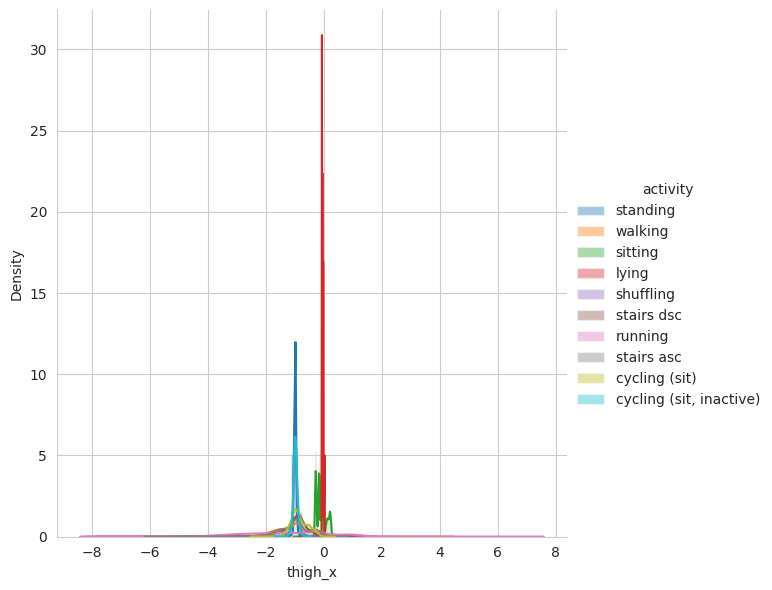

In [747]:
sns.FacetGrid(plottingData, hue ='activity', size = 6).map(sns.distplot, 'thigh_x').add_legend()

/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/D

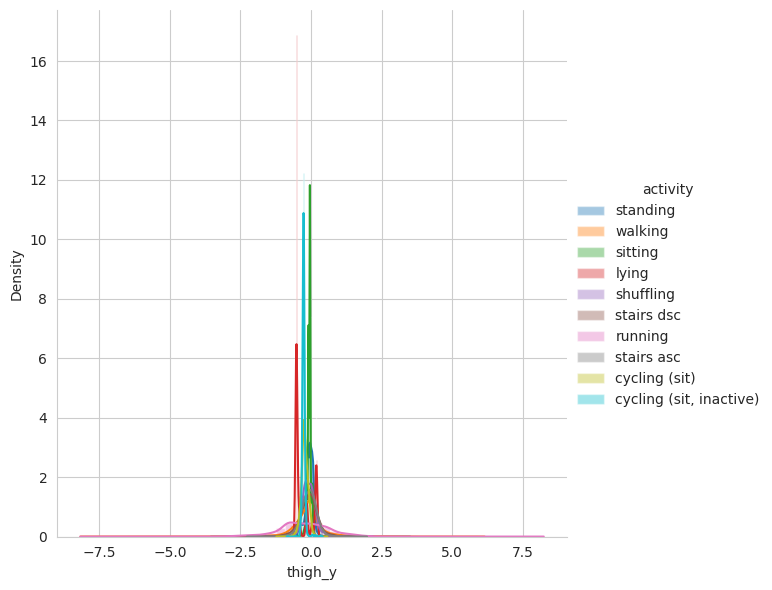

In [748]:
sns.FacetGrid(plottingData, hue ='activity', size = 6).map(sns.distplot, 'thigh_y').add_legend()

/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teodora/D

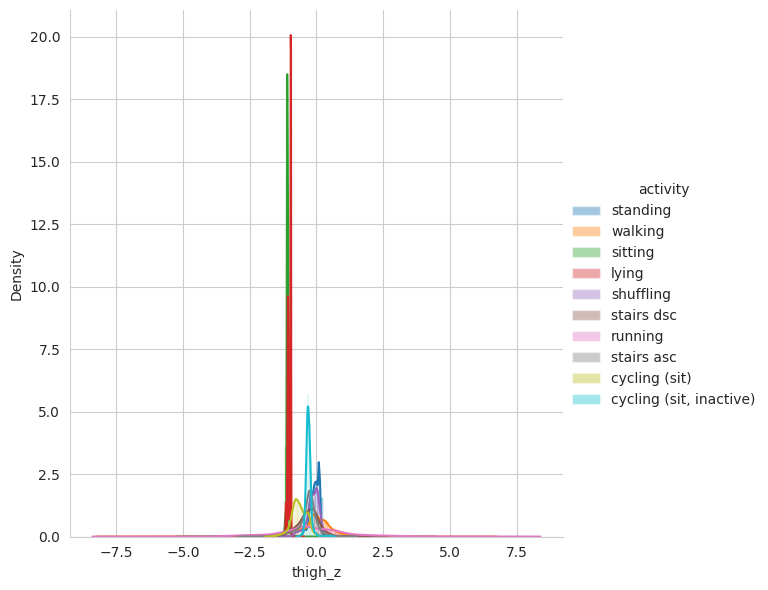

In [749]:
sns.FacetGrid(plottingData, hue ='activity', size = 6).map(sns.distplot, 'thigh_z').add_legend()

### Find duration of data recording

In [822]:
#data_13['timestamp'] = data_13['timestamp'].astype('str')
#data_14['timestamp'] = data_14['timestamp'].astype('str')
data_24['timestamp'] = data_24['timestamp'].astype('str')
data_27['timestamp'] = data_27['timestamp'].astype('str')
data_28['timestamp'] = data_28['timestamp'].astype('str')
data_29['timestamp'] = data_29['timestamp'].astype('str')

In [823]:
def sampleTime(dataset):
    s = dataset['timestamp'].max()
    delimiter = " "

    time_str = s.partition(delimiter)[2]
    hours = int(time_str[0:2])
    minutes = int(time_str[3:5])
    seconds = int(time_str[6:8])
    miliseconds = int(time_str[9:])

    time = hours*360 + minutes*60 + seconds + miliseconds/1000
    return time


In [824]:
#time13 = sampleTime(data_13)
#time14 = sampleTime(data_14)
time24 = sampleTime(data_24)
time27 = sampleTime(data_27)
time28 = sampleTime(data_28)
time29 = sampleTime(data_29)

### Descending window and overlap input data

In [825]:
from numpy.lib.stride_tricks import as_strided

def windowed_view(arr, window, overlap):
    arr = np.asarray(arr)
    window_step = window - overlap
    new_shape = arr.shape[:-1] + ((arr.shape[-1] - overlap) // window_step, window)
    new_strides = (arr.strides[:-1] + (window_step * arr.strides[-1],) + arr.strides[-1:])
    return as_strided(arr, shape=new_shape, strides=new_strides)

In [826]:
data_24['back_x'].shape[0] == data_24['back_y'].shape[0] == data_24['back_z'].shape[0] == data_24['thigh_x'].shape[0] == data_24['thigh_y'].shape[0] == data_24['thigh_z'].shape[0]

True

#### First observed sensor (on a back)

In [827]:
# backX_13 = windowed_view(np.array(data_13['back_x']), 128, 64)
# backY_13 = windowed_view(np.array(data_13['back_y']), 128, 64)
# backZ_13 = windowed_view(np.array(data_13['back_z']), 128, 64)
# backX_14 = windowed_view(np.array(data_14['back_x']), 128, 64)
# backY_14 = windowed_view(np.array(data_14['back_y']), 128, 64)
# backZ_14 = windowed_view(np.array(data_14['back_z']), 128, 64)
backX_24 = windowed_view(np.array(data_24['back_x']), 128, 64)
backY_24 = windowed_view(np.array(data_24['back_y']), 128, 64)
backZ_24 = windowed_view(np.array(data_24['back_z']), 128, 64)
backX_27 = windowed_view(np.array(data_27['back_x']), 128, 64)
backY_27 = windowed_view(np.array(data_27['back_y']), 128, 64)
backZ_27 = windowed_view(np.array(data_27['back_z']), 128, 64)
backX_28 = windowed_view(np.array(data_28['back_x']), 128, 64)
backY_28 = windowed_view(np.array(data_28['back_y']), 128, 64)
backZ_28 = windowed_view(np.array(data_28['back_z']), 128, 64)
backX_29 = windowed_view(np.array(data_29['back_x']), 128, 64)
backY_29 = windowed_view(np.array(data_29['back_y']), 128, 64)
backZ_29 = windowed_view(np.array(data_29['back_z']), 128, 64)

#### Second observed sensor (on a thigh)

In [828]:
# thighX_13 = windowed_view(np.array(data_13['thigh_x']), 128, 64)
# thighY_13 = windowed_view(np.array(data_13['thigh_y']), 128, 64)
# thighZ_13 = windowed_view(np.array(data_13['thigh_z']), 128, 64)
# thighX_14 = windowed_view(np.array(data_14['thigh_x']), 128, 64)
# thighY_14 = windowed_view(np.array(data_14['thigh_y']), 128, 64)
# thighZ_14 = windowed_view(np.array(data_14['thigh_z']), 128, 64)
thighX_24 = windowed_view(np.array(data_24['thigh_x']), 128, 64)
thighY_24 = windowed_view(np.array(data_24['thigh_y']), 128, 64)
thighZ_24 = windowed_view(np.array(data_24['thigh_z']), 128, 64)
thighX_27 = windowed_view(np.array(data_27['thigh_x']), 128, 64)
thighY_27 = windowed_view(np.array(data_27['thigh_y']), 128, 64)
thighZ_27 = windowed_view(np.array(data_27['thigh_z']), 128, 64)
thighX_28 = windowed_view(np.array(data_28['thigh_x']), 128, 64)
thighY_28 = windowed_view(np.array(data_28['thigh_y']), 128, 64)
thighZ_28 = windowed_view(np.array(data_28['thigh_z']), 128, 64)
thighX_29 = windowed_view(np.array(data_29['thigh_x']), 128, 64)
thighY_29 = windowed_view(np.array(data_29['thigh_y']), 128, 64)
thighZ_29 = windowed_view(np.array(data_29['thigh_z']), 128, 64)

### Noise reduction

In [829]:
from scipy.signal import butter, sosfilt

def sampledData(data):
    SAMPLE_RATE = 50    #50 Hz is the sensors' frequency
    N_SAMP = 128

    signal = np.array(data, dtype=float)
    #w = fft(signal)[1:]
    #freqs = scipy.fft.rfftfreq(N_SAMP, 1 / SAMPLE_RATE)[1:]
    #id_peak = np.argmax(np.abs(w))
    #frequency = freqs[id_peak]
    sos_noice = butter(2, 20.0, 'low', fs=SAMPLE_RATE, output='sos')
    noice_reduction = sosfilt(sos_noice, signal)

    sos = butter(2, 0.3, 'low', fs=SAMPLE_RATE, output='sos')
    body_acceleration = sosfilt(sos, signal)

    return body_acceleration

### Update acceleration signals

In [830]:
def dataFrameWithOverlap(newDF, oldDF, itemsOverlap):
  numberForRemove = oldDF.shape[0] % 128
  data_24_sampled = newDF.head(-numberForRemove)
  for item in itemsOverlap:
    counter = 0
    for i in range(0, oldDF[item[0]].shape[0]-127, 64):
      if counter==0:
        newDF[item[0]][i:i+128] = sampledData(item[1][counter])/[2]
      else:
        newDF[item[0]][i:i+64] = np.array(list(map(np.add, newDF[item[0]][i:i+64].tolist(), (sampledData(item[1][counter])/[2])[0:64].tolist())))
        newDF[item[0]][i+64:i+128] = (sampledData(item[1][counter])/[2])[64:128]
      
      counter += 1

    newDF[item[0]][0:64] *= 2
    newDF[item[0]][-64:] *= 2

In [831]:
# data_13_sampled = data_13.copy()
# items_13 = [('back_x', backX_13), ('back_y', backY_13), ('back_z', backZ_13), ('thigh_x', thighX_13), ('thigh_y', thighY_13), ('thigh_z', thighZ_13)]
# data_14_sampled = data_14.copy()
# items_14 = [('back_x', backX_14), ('back_y', backY_14), ('back_z', backZ_14), ('thigh_x', thighX_14), ('thigh_y', thighY_14), ('thigh_z', thighZ_14)]
data_24_sampled = data_24.copy()
items_24 = [('back_x', backX_24), ('back_y', backY_24), ('back_z', backZ_24), ('thigh_x', thighX_24), ('thigh_y', thighY_24), ('thigh_z', thighZ_24)]
data_27_sampled = data_27.copy()
items_27 = [('back_x', backX_27), ('back_y', backY_27), ('back_z', backZ_27), ('thigh_x', thighX_27), ('thigh_y', thighY_27), ('thigh_z', thighZ_27)]
data_28_sampled = data_28.copy()
items_28 = [('back_x', backX_28), ('back_y', backY_28), ('back_z', backZ_28), ('thigh_x', thighX_28), ('thigh_y', thighY_28), ('thigh_z', thighZ_28)]
data_29_sampled = data_29.copy()
items_29 = [('back_x', backX_29), ('back_y', backY_29), ('back_z', backZ_29), ('thigh_x', thighX_29), ('thigh_y', thighY_29), ('thigh_z', thighZ_29)]

In [760]:
#dataFrameWithOverlap(data_13_sampled, data_13, items_13)

In [761]:
# dataFrameWithOverlap(data_14_sampled, data_14, items_14)

In [832]:
dataFrameWithOverlap(data_24_sampled, data_24, items_24)

/tmp/ipykernel_3174200/1845942610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+128] = sampledData(item[1][counter])/[2]
/tmp/ipykernel_3174200/1845942610.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+64] = np.array(list(map(np.add, newDF[item[0]][i:i+64].tolist(), (sampledData(item[1][counter])/[2])[0:64].tolist())))
/tmp/ipykernel_3174200/1845942610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [833]:
dataFrameWithOverlap(data_27_sampled, data_27, items_27)

/tmp/ipykernel_3174200/1845942610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+128] = sampledData(item[1][counter])/[2]
/tmp/ipykernel_3174200/1845942610.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+64] = np.array(list(map(np.add, newDF[item[0]][i:i+64].tolist(), (sampledData(item[1][counter])/[2])[0:64].tolist())))
/tmp/ipykernel_3174200/1845942610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [834]:
dataFrameWithOverlap(data_28_sampled, data_28, items_28)

/tmp/ipykernel_3174200/1845942610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+128] = sampledData(item[1][counter])/[2]
/tmp/ipykernel_3174200/1845942610.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+64] = np.array(list(map(np.add, newDF[item[0]][i:i+64].tolist(), (sampledData(item[1][counter])/[2])[0:64].tolist())))
/tmp/ipykernel_3174200/1845942610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [835]:
dataFrameWithOverlap(data_29_sampled, data_29, items_29)

/tmp/ipykernel_3174200/1845942610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+128] = sampledData(item[1][counter])/[2]
/tmp/ipykernel_3174200/1845942610.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF[item[0]][i:i+64] = np.array(list(map(np.add, newDF[item[0]][i:i+64].tolist(), (sampledData(item[1][counter])/[2])[0:64].tolist())))
/tmp/ipykernel_3174200/1845942610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [878]:
data_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170534 entries, 0 to 170533
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  170534 non-null  object 
 1   back_x     170534 non-null  float64
 2   back_y     170534 non-null  float64
 3   back_z     170534 non-null  float64
 4   thigh_x    170534 non-null  float64
 5   thigh_y    170534 non-null  float64
 6   thigh_z    170534 non-null  float64
 7   label      170534 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.4+ MB


In [836]:
data_24_sampled.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,170534.000000,170534.000000,170534.000000,170534.000000,170534.000000,170534.000000,170534.000000
mean,-0.533366,-0.026928,-0.114606,-0.565965,-0.079002,-0.226910,3.385565
std,0.272451,0.064969,0.352196,0.351821,0.140692,0.302072,2.885979
min,-3.049316,-2.144042,-0.875000,-5.773926,-4.125976,-1.531250,1.000000
25%,-0.754041,-0.064521,-0.348266,-0.856540,-0.069573,-0.436472,1.000000
50%,-0.580822,-0.043161,-0.255546,-0.635356,-0.025377,-0.073244,2.000000
75%,-0.418387,0.008660,0.180002,-0.127070,-0.005034,-0.031328,7.000000
max,0.044013,0.735840,1.006836,0.341144,6.901856,3.259766,8.000000


### Merge multiple datasets

In [837]:
# mergeDF1 = data_13_sampled.append(data_14_sampled)
# mergeDF2 = mergeDF1.append(data_24_sampled)
# mergeDF3 = mergeDF2.append(data_27_sampled)
# mergeDF4 = mergeDF3.append(data_28_sampled)
# data = mergeDF4.append(data_29_sampled)

mergeDF1 = data_24_sampled.append(data_27_sampled)
mergeDF2 = mergeDF1.append(data_28_sampled)
data = mergeDF2.append(data_29_sampled)

data.sample(10)

/tmp/ipykernel_3174200/2808825407.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergeDF1 = data_24_sampled.append(data_27_sampled)
/tmp/ipykernel_3174200/2808825407.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergeDF2 = mergeDF1.append(data_28_sampled)
/tmp/ipykernel_3174200/2808825407.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = mergeDF2.append(data_29_sampled)


,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
98186,2019-01-12 00:33:09.040,-0.493585,-0.052559,-0.208302,-0.537186,0.013095,0.004398,1
8776,2019-01-12 00:03:00.520,-0.037592,0.008175,0.360447,-0.024454,-0.246713,-0.462663,8
69720,2019-01-12 00:23:39.720,-0.601815,-0.038532,-0.327589,-0.701649,-0.043274,-0.061260,2
32139,2019-01-12 00:10:47.780,-0.039647,0.015735,0.379754,-0.031312,-0.261896,-0.482684,8
100980,2019-01-12 00:34:04.920,-0.836449,-0.058645,-0.321765,-0.918162,-0.015793,-0.048192,1
14226,2019-01-12 00:04:57.240,-0.569071,-0.058491,-0.171873,-0.559807,-0.072661,0.081190,3
28238,2019-01-12 00:10:07.080,-0.545435,-0.042737,-0.198245,-0.553420,-0.038760,-0.095921,1
113106,2019-01-12 00:38:04.840,-0.537859,-0.055035,-0.173743,-0.680955,-0.214262,-0.040746,2
31139,2019-01-12 00:11:05.100,-0.770600,-0.062934,-0.259466,-0.805401,-0.056902,-0.076333,1
113119,2019-01-12 00:39:24.420,-0.670085,-0.038150,-0.127962,-0.821930,-0.092549,-0.196762,2


In [838]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673012 entries, 0 to 178715
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  673012 non-null  object 
 1   back_x     673012 non-null  float64
 2   back_y     673012 non-null  float64
 3   back_z     673012 non-null  float64
 4   thigh_x    673012 non-null  float64
 5   thigh_y    673012 non-null  float64
 6   thigh_z    673012 non-null  float64
 7   label      673012 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 46.2+ MB


### Exploratory data analysis

In [839]:
data.shape

(673012, 8)

In [840]:
data = data.drop(['timestamp'], axis=1)

data = data.dropna()
data.isnull().sum()

back_x     0
back_y     0
back_z     0
thigh_x    0
thigh_y    0
thigh_z    0
label      0
dtype: int64

In [841]:
data.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,673012.000000,673012.000000,673012.000000,673012.000000,673012.000000,673012.000000,673012.000000
mean,-0.626161,-0.043963,-0.165499,-0.698042,-0.118454,-0.158838,2.856029
std,0.233497,0.041696,0.242226,0.308699,0.107096,0.232776,6.705956
min,-8.018554,-2.144042,-2.364258,-12.055176,-4.125976,-7.026856,1.000000
25%,-0.809476,-0.062528,-0.276779,-0.926292,-0.190168,-0.167789,1.000000
50%,-0.653488,-0.046762,-0.216973,-0.742165,-0.099876,-0.089137,1.000000
75%,-0.491338,-0.032241,-0.154477,-0.546542,-0.043975,-0.030779,2.000000
max,1.140136,2.486816,1.006836,3.927734,6.901856,11.062012,130.000000


### Data preprocessing

In [842]:
def preprocessing3D(sampledDataFrame):
    transformedData = np.zeros((sampledDataFrame.shape[0] ,3))
    sampledDataFrame = sampledDataFrame.to_numpy()
    for i in range(sampledDataFrame.shape[1]):
        transformedData[:,i] = np.abs(np.fft.fft(sampledDataFrame[:,i]))
    transformedData[0]*=0
    return transformedData[:,0].tolist(), transformedData[:,1].tolist(), transformedData[:,2].tolist()

In [774]:
# fAccBackX_13, fAccBackY_13, fAccBackZ_13 = preprocessing3D(data_13_sampled.iloc[:,[1,2,3]])
# fAccThighX_13, fAccThighY_13, fAccThighZ_13 = preprocessing3D(data_13_sampled.iloc[:,[4,5,6]])

In [775]:
# fAccBackX_14, fAccBackY_14, fAccBackZ_14 = preprocessing3D(data_14_sampled.iloc[:,[1,2,3]])
# fAccThighX_14, fAccThighY_14, fAccThighZ_14 = preprocessing3D(data_14_sampled.iloc[:,[4,5,6]])

In [843]:
fAccBackX_24, fAccBackY_24, fAccBackZ_24 = preprocessing3D(data_24_sampled.iloc[:,[1,2,3]])
fAccThighX_24, fAccThighY_24, fAccThighZ_24 = preprocessing3D(data_24_sampled.iloc[:,[4,5,6]])

In [844]:
fAccBackX_27, fAccBackY_27, fAccBackZ_27 = preprocessing3D(data_27_sampled.iloc[:,[1,2,3]])
fAccThighX_27, fAccThighY_27, fAccThighZ_27 = preprocessing3D(data_27_sampled.iloc[:,[4,5,6]])

In [845]:
fAccBackX_28, fAccBackY_28, fAccBackZ_28 = preprocessing3D(data_28_sampled.iloc[:,[1,2,3]])
fAccThighX_28, fAccThighY_28, fAccThighZ_28 = preprocessing3D(data_28_sampled.iloc[:,[4,5,6]])

In [846]:
fAccBackX_29, fAccBackY_29, fAccBackZ_29 = preprocessing3D(data_29_sampled.iloc[:,[1,2,3]])
fAccThighX_29, fAccThighY_29, fAccThighZ_29 = preprocessing3D(data_29_sampled.iloc[:,[4,5,6]])

#### Expanding dataset

In [847]:
# fBackX = [*fAccBackX_13, *fAccBackX_14, *fAccBackX_24, *fAccBackX_27, *fAccBackX_28, *fAccBackX_29]
# fBackY = [*fAccBackY_13, *fAccBackY_14, *fAccBackY_24, *fAccBackY_27, *fAccBackY_28, *fAccBackY_29]
# fBackZ = [*fAccBackZ_13, *fAccBackZ_14, *fAccBackZ_24, *fAccBackZ_27, *fAccBackZ_28, *fAccBackZ_29]
# fThighX = [*fAccThighX_13, *fAccThighX_14, *fAccThighX_24, *fAccThighX_27, *fAccThighX_28, *fAccThighX_29]
# fThighY = [*fAccThighY_13, *fAccThighY_14, *fAccThighY_24, *fAccThighY_27, *fAccThighY_28, *fAccThighY_29]
# fThighZ = [*fAccThighZ_13, *fAccThighZ_14, *fAccThighZ_24, *fAccThighZ_27, *fAccThighZ_28, *fAccThighZ_29]

fBackX = [*fAccBackX_24, *fAccBackX_27, *fAccBackX_28, *fAccBackX_29]
fBackY = [*fAccBackY_24, *fAccBackY_27, *fAccBackY_28, *fAccBackY_29]
fBackZ = [*fAccBackZ_24, *fAccBackZ_27, *fAccBackZ_28, *fAccBackZ_29]
fThighX = [*fAccThighX_24, *fAccThighX_27, *fAccThighX_28, *fAccThighX_29]
fThighY = [*fAccThighY_24, *fAccThighY_27, *fAccThighY_28, *fAccThighY_29]
fThighZ = [*fAccThighZ_24, *fAccThighZ_27, *fAccThighZ_28, *fAccThighZ_29]

In [848]:
frequent_domain_data = {'f_back_x': fBackX, 'f_back_y': fBackY, 'f_back_z': fBackZ, 'f_thigh_x': fThighX, 'f_thigh_y': fThighY, 'f_thigh_z': fThighZ}

data = data.assign(**frequent_domain_data)

#### Resultant acceleration

In [849]:
data['back_resultant'] = np.sqrt(data['back_x'] ** 2 + data['back_y'] ** 2 + data['back_z'] ** 2)
data['thigh_resultant'] = np.sqrt(data['thigh_x'] ** 2 + data['thigh_y'] ** 2 + data['thigh_z'] ** 2)

#### Data standardization

In [850]:
data['back_x_stdandardized'] = (data['back_x'] - data['back_x'].mean()) / data['back_x'].std()
data['back_y_stdandardized'] = (data['back_y'] - data['back_y'].mean()) / data['back_y'].std()
data['back_z_stdandardized'] = (data['back_z'] - data['back_z'].mean()) / data['back_z'].std()
data['f_back_x_stdandardized'] = (data['f_back_x'] - data['f_back_x'].mean()) / data['f_back_x'].std()
data['f_back_y_stdandardized'] = (data['f_back_y'] - data['f_back_y'].mean()) / data['f_back_y'].std()
data['f_back_z_stdandardized'] = (data['f_back_z'] - data['f_back_z'].mean()) / data['f_back_z'].std()

In [851]:
data['thigh_x_stdandardized'] = (data['thigh_x'] - data['thigh_x'].mean()) / data['thigh_x'].std()
data['thigh_y_stdandardized'] = (data['thigh_y'] - data['thigh_y'].mean()) / data['thigh_y'].std()
data['thigh_z_stdandardized'] = (data['thigh_z'] - data['thigh_z'].mean()) / data['thigh_z'].std()
data['f_thigh_x_stdandardized'] = (data['f_thigh_x'] - data['f_thigh_x'].mean()) / data['f_thigh_x'].std()
data['f_thigh_y_stdandardized'] = (data['f_thigh_y'] - data['f_thigh_y'].mean()) / data['f_thigh_y'].std()
data['f_thigh_z_stdandardized'] = (data['f_thigh_z'] - data['f_thigh_z'].mean()) / data['f_thigh_z'].std()

#### Vertical acceleration's angle

In [852]:
import math

def vertical_angle(data):
  m = data.mean(axis=0)
  m = m/(m**2).sum()**0.5
  return math.degrees(np.arccos(m[1]))

In [853]:
data['back_angle'] = vertical_angle(data.iloc[:,0:3])
data['thigh_angle'] = vertical_angle(data.iloc[:,3:6])

In [883]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673012 entries, 0 to 178715
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   back_x                   673012 non-null  int64
 1   back_y                   673012 non-null  int64
 2   back_z                   673012 non-null  int64
 3   thigh_x                  673012 non-null  int64
 4   thigh_y                  673012 non-null  int64
 5   thigh_z                  673012 non-null  int64
 6   f_back_x                 673012 non-null  int64
 7   f_back_y                 673012 non-null  int64
 8   f_back_z                 673012 non-null  int64
 9   f_thigh_x                673012 non-null  int64
 10  f_thigh_y                673012 non-null  int64
 11  f_thigh_z                673012 non-null  int64
 12  back_resultant           673012 non-null  int64
 13  thigh_resultant          673012 non-null  int64
 14  back_x_stdandardized     673012 non-

In [855]:
data.isna().sum()

back_x                     0
back_y                     0
back_z                     0
thigh_x                    0
thigh_y                    0
thigh_z                    0
label                      0
f_back_x                   0
f_back_y                   0
f_back_z                   0
f_thigh_x                  0
f_thigh_y                  0
f_thigh_z                  0
back_resultant             0
thigh_resultant            0
back_x_stdandardized       0
back_y_stdandardized       0
back_z_stdandardized       0
f_back_x_stdandardized     0
f_back_y_stdandardized     0
f_back_z_stdandardized     0
thigh_x_stdandardized      0
thigh_y_stdandardized      0
thigh_z_stdandardized      0
f_thigh_x_stdandardized    0
f_thigh_y_stdandardized    0
f_thigh_z_stdandardized    0
back_angle                 0
thigh_angle                0
dtype: int64

In [856]:
data = data[[col for col in data.columns if col != 'label'] + ['label']]

### Modeling

In [857]:
#X = data.drop(data.columns[[0, 1, 2, 3, 4, 5, 24]], axis=1)
X = data.drop(['label'], axis=1)
y = data['label']

In [858]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)

#### PCA

In [859]:
from sklearn.decomposition import PCA

def performPCA(dataset, dataForDimReduction, label):
    pca = PCA(n_components=2, random_state=1)
    twoDimData = pca.fit_transform(dataForDimReduction)
    dataset[label + '_x'] = twoDimData[:,0]
    dataset[label + '_y'] = twoDimData[:,1]

In [860]:
performPCA(data, data.iloc[:,0:3], 'pca_back')
performPCA(data, data.iloc[:,3:6], 'pca_thigh')
performPCA(data, data.iloc[:,6:9], 'pca_f_back')
performPCA(data, data.iloc[:,9:12], 'pca_f_thigh')

In [861]:
data = data[[col for col in data.columns if col != 'label'] + ['label']]

In [862]:
datasetLabels = data['label'].unique()
for lab in datasetLabels:
    print(f'label {lab} with element count', data['label'].value_counts()[lab])


label 6 with element count 32769
label 1 with element count 351272
label 7 with element count 29772
label 8 with element count 48460
label 3 with element count 12815
label 5 with element count 5330
label 2 with element count 175813
label 4 with element count 4748
label 13 with element count 10443
label 130 with element count 1590


In [863]:
## Encoding the data
from sklearn.preprocessing import LabelEncoder

cat_cols =[x for x in data.columns if data[x].dtype=="object"]

le=LabelEncoder()

data = data.apply(lambda cat_cols: le.fit_transform(cat_cols.astype(str)), axis=0, result_type='expand')

In [864]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673012 entries, 0 to 178715
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   back_x                   673012 non-null  int64
 1   back_y                   673012 non-null  int64
 2   back_z                   673012 non-null  int64
 3   thigh_x                  673012 non-null  int64
 4   thigh_y                  673012 non-null  int64
 5   thigh_z                  673012 non-null  int64
 6   f_back_x                 673012 non-null  int64
 7   f_back_y                 673012 non-null  int64
 8   f_back_z                 673012 non-null  int64
 9   f_thigh_x                673012 non-null  int64
 10  f_thigh_y                673012 non-null  int64
 11  f_thigh_z                673012 non-null  int64
 12  back_resultant           673012 non-null  int64
 13  thigh_resultant          673012 non-null  int64
 14  back_x_stdandardized     673012 non-

In [865]:
#X = data.drop(data.columns[[0, 1, 2, 3, 4, 5, 32]], axis=1)
X = data.drop(['label'], axis=1)
y = data['label']

In [866]:
print(X.shape)
print(y.shape)

print(data['label'].unique())

(673012, 36)
(673012,)
[7 0 8 9 4 6 3 5 1 2]


In [867]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(538409, 28) (134603, 28) (538409,) (134603,)


In [868]:
lr =  LogisticRegression(penalty='l2', warm_start=True, random_state=0) 
#dt = DecisionTreeClassifier(criterion='log_loss', random_state=0)

lr.fit(X_train,y_train)
#dt.fit(X_train, y_train)

/home/teodora/Desktop/Master/Flower/flower/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0, warm_start=True)

In [869]:
lr_preds = lr.predict(X_test)
#dt_preds = dt.predict(X_test)

In [870]:
lr_pred = accuracy_score(lr_preds, y_test)
#dt_pred = accuracy_score(dt_preds, y_test)
print(lr_pred)
#print(dt_pred)

0.8958418460212625


In [871]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, lr_preds)
cnf_matrix

array([[67624,    71,     0,  1376,    91,   159,   175,   750,     3,
            6],
       [   76,  1907,    71,     5,     9,    21,     0,     0,     0,
            0],
       [   31,   155,   123,     0,     0,     0,     0,     9,     0,
            0],
       [ 4103,     0,     0, 31036,     3,     4,     7,     8,     1,
            1],
       [ 1354,    46,     8,    60,   157,    86,    52,   775,    25,
            0],
       [  376,     6,     0,   119,    31,   393,     4,    20,     0,
            0],
       [  882,     0,     0,    13,     2,     0,   169,     0,     0,
            0],
       [ 2516,    95,    69,    45,   111,    41,    14,  3639,    24,
            0],
       [    1,     0,     0,     0,    26,     7,     1,     7,  5887,
           25],
       [    2,     0,     0,     0,     2,     0,     0,     0,    40,
         9648]])

Text(0.5, 427.9555555555555, 'Predicted label')

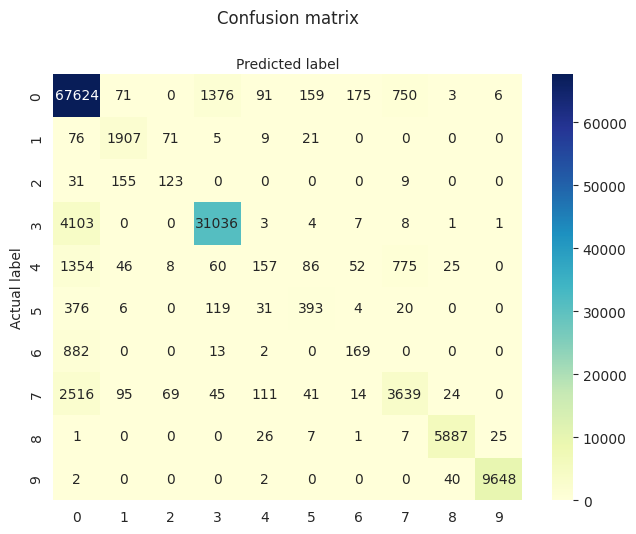

In [872]:
class_names=['walking', 'running', 'shuffling', 'stairs asc', 'stairs dsc', 'standing', 'sitting', 'lying', 'cycling (sit)', 'cycling (sit, inactive)']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Client datasets

In [873]:
df_shuffled = shuffle(data, random_state=42)

In [874]:
data_client_even = df_shuffled.iloc[::2]
data_client_odd = df_shuffled.iloc[1::2]

data_subject_1 = data_client_even.iloc[::2]
data_subject_2 = data_client_even.iloc[1::2]
data_subject_3 = data_client_odd.iloc[::2]
data_subject_4 = data_client_odd.iloc[1::2]

print(data_client_even.shape)
print(data_client_odd.shape)

print(data_subject_1.shape)
print(data_subject_2.shape)
print(data_subject_3.shape)
print(data_subject_4.shape)

(336506, 37)
(336506, 37)
(168253, 37)
(168253, 37)
(168253, 37)
(168253, 37)


In [875]:
#data_client_even.to_csv("even_index.csv")
#data_client_odd.to_csv("odd_index.csv")

data_subject_1.to_csv("subject_1.csv")
data_subject_2.to_csv("subject_2.csv")
data_subject_3.to_csv("subject_3.csv")
data_subject_4.to_csv("subject_4.csv")